In [77]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx



import sklearn.model_selection as sklm


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as skl





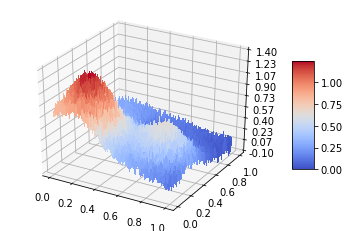

In [78]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
n_x         = 200

# Make data. 
x           = np.sort(np.random.uniform(0, 1, n_x))
y           = np.sort(np.random.uniform(0, 1, n_x))

x, y        = np.meshgrid(x,y)
noise_level = 0.05


frank       = fx.FrankeFunction(x, y, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x, y, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


## oppgave 1 
standard ols.
confidence intervals for beta by computing their variances.
evaluate MSE and R2.

In [79]:


x           = np.sort(np.random.uniform(0, 1, n_x))
y           = np.sort(np.random.uniform(0, 1, n_x))


maxpower = 5
beta_result = np.array([1,1])
pred_result = np.array([1,1])

mse_ols=np.empty([maxpower])
r2_ols=np.empty([maxpower])
mse_ols_scikit=np.empty([maxpower])
r2_ols_scikit=np.empty([maxpower])


for i in range(maxpower):

    design      = fx.DesignDesign(x,y,i+1)
    beta_ols, frank_pred_ols  = fx.OridinaryLeastSquares(design,np.ravel(frank),design)
    #beta_result = np.stack(beta_result,beta_ols)
    #pred_result = np.stack(pred_result,frank_pred_ols)
    
    mse_ols[i] = fx.MSE(np.ravel(frank),frank_pred_ols)
    r2_ols[i] = fx.R2Score(np.ravel(frank),frank_pred_ols)
    
    mse_ols_scikit[i] = mean_squared_error(np.ravel(frank),frank_pred_ols)
    r2_ols_scikit[i] = r2_score(np.ravel(frank),frank_pred_ols)
    
    

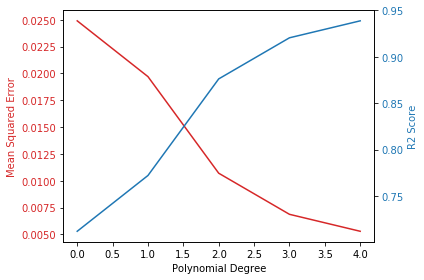

In [56]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ols, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ols, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

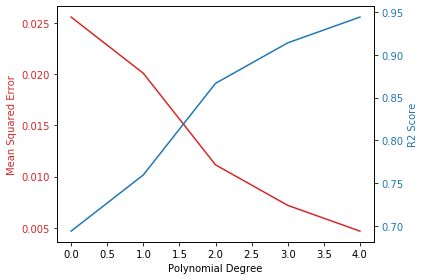

In [82]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Polynomial Degree')
ax1.set_ylabel('Mean Squared Error', color=color)
ax1.plot(range(maxpower), mse_ols_scikit, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 Score', color=color)  # we already handled the x-label with ax1
ax2.plot(range(maxpower), r2_ols_scikit, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
 Finner konfidens intervallet til β. 

xtx = np.linalg.pinv(X.T.dot(X))
    
var_Beta = xtx * sigma**2

# Finn konfidensintervallet(KI) til β ved å finne variansen

# s.31 i regression slides

z_mean = (1/n ) * np.sum(z) #np.mean(y)
var_z = (1/n)* np.sum((z-z_mean)**2)#np.mean((z-z_mean)**2) 

#print(var_z)

std_err= np.sqrt(np.diag(var_Beta))

confidence = 0.95

h = std_err * t.ppf((1 + confidence) / 2, n - 1)

start = np.ravel(beta_ols) - h
#print(start)
end = np.ravel(beta_ols) + h
#print(end)